<a href="https://colab.research.google.com/github/Jai-Kumar786/Full-Fledged-BERT-Question-Answering-Application/blob/main/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Run this cell to check GPU
!nvidia-smi


Thu Oct 23 08:08:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              8W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import torch

print("🔍 GPU Status Check:")
print("=" * 50)
print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ CUDA available: {torch.cuda.is_available()}")
print(f"✅ CUDA version: {torch.version.cuda}")
print(f"✅ Number of GPUs: {torch.cuda.device_count()}")

if torch.cuda.is_available():
    print(f"✅ GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"✅ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print("\n🎉 GPU is ready for training!")
else:
    print("\n⚠️ GPU not detected by PyTorch")


🔍 GPU Status Check:
✅ PyTorch version: 2.8.0+cu126
✅ CUDA available: True
✅ CUDA version: 12.6
✅ Number of GPUs: 1
✅ GPU Name: Tesla T4
✅ GPU Memory: 15.83 GB

🎉 GPU is ready for training!


Set up Google Colab: Open Colab, ensure you have GPU access selected (Runtime > Change runtime type > T4 GPU). This is crucial for training later.


Create GitHub Repository: Go to GitHub and create a new repository. This will be used for version control and later for deploying your Streamlit app.



Install Libraries: In your Colab notebook, install all necessary packages.

Python

!pip install datasets transformers torch streamlit gradio

In [ ]:
!pip install datasets transformers torch streamlit gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.1 MB/s eta 0:00:00


Load SQuAD (Q1.1): Use the datasets library to load the SQuAD dataset

In [9]:
# ============================================
# QUESTION 1.1: Load SQuAD Dataset (2.5 marks)
# ============================================

from datasets import load_dataset
import pandas as pd

# Load the SQuAD dataset
print("📥 Loading SQuAD dataset...")
dataset = load_dataset("squad")

# Display dataset structure
print("\n✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Structure:")
print(dataset)


📥 Loading SQuAD dataset...

✅ Dataset loaded successfully!

📊 Dataset Structure:
DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})


Subset Data (Q1.2): Create the smaller training (3000) and validation (500) sets as specified in the assignment.

In [10]:
# ============================================
# QUESTION 1.2: Create Data Subsets (2.5 marks)
# ============================================

# Create training subset (3000 examples)
train_dataset = dataset['train'].select(range(3000))

# Create validation subset (500 examples)
val_dataset = dataset['validation'].select(range(500))

# Verify subset sizes
print(f"✅ Training subset: {len(train_dataset)} examples")
print(f"✅ Validation subset: {len(val_dataset)} examples")
print(f"\n📉 Reduction: {87599} → {3000} training examples")
print(f"   ({(3000/87599)*100:.1f}% of original)")


✅ Training subset: 3000 examples
✅ Validation subset: 500 examples

📉 Reduction: 87599 → 3000 training examples
   (3.4% of original)


Explore Q&A (Q1.3): Print a few examples to understand the data structure (id, title, context, question, answers).

In [11]:
# ============================================
# QUESTION 1.3: Explore Dataset Examples (2.5 marks)
# ============================================

def print_qa_example(example, index):
    """Pretty print a Q&A example"""
    print(f"\n{'='*80}")
    print(f"📄 EXAMPLE {index + 1}")
    print(f"{'='*80}")
    print(f"\n📍 Title: {example['title']}")
    print(f"\n📝 Context (first 300 chars):")
    print(f"   {example['context'][:300]}...")
    print(f"\n❓ Question:")
    print(f"   {example['question']}")
    print(f"\n✅ Answer:")
    print(f"   Text: '{example['answers']['text'][0]}'")
    print(f"   Start Position: {example['answers']['answer_start'][0]}")
    print(f"{'='*80}\n")

# Print first 3 examples from training set
print("🔍 EXPLORING TRAINING EXAMPLES\n")
for i in range(3):
    print_qa_example(train_dataset[i], i)


🔍 EXPLORING TRAINING EXAMPLES


📄 EXAMPLE 1

📍 Title: University_of_Notre_Dame

📝 Context (first 300 chars):
   Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is ...

❓ Question:
   To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?

✅ Answer:
   Text: 'Saint Bernadette Soubirous'
   Start Position: 515


📄 EXAMPLE 2

📍 Title: University_of_Notre_Dame

📝 Context (first 300 chars):
   Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is ...

❓ Question:
   What is in front of th

Analyze Statistics (Q1.4): Calculate the average lengths of contexts and questions. This helps in setting tokenization parameters later

In [12]:
# ============================================
# QUESTION 1.4: Dataset Statistics (2.5 marks)
# ============================================

import numpy as np
import matplotlib.pyplot as plt

# Calculate average context length
context_lengths = [len(example['context'].split()) for example in train_dataset]
avg_context_len = np.mean(context_lengths)

# Calculate average question length
question_lengths = [len(example['question'].split()) for example in train_dataset]
avg_question_len = np.mean(question_lengths)

# Calculate answer statistics
answer_lengths = [len(example['answers']['text'][0].split()) for example in train_dataset]
answer_starts = [example['answers']['answer_start'][0] for example in train_dataset]

# Print statistics
print("📊 DATASET STATISTICS")
print("=" * 50)
print(f"\n📏 Context Statistics:")
print(f"   Average length: {avg_context_len:.2f} words")
print(f"   Min length: {min(context_lengths)} words")
print(f"   Max length: {max(context_lengths)} words")

print(f"\n❓ Question Statistics:")
print(f"   Average length: {avg_question_len:.2f} words")
print(f"   Min length: {min(question_lengths)} words")
print(f"   Max length: {max(question_lengths)} words")

print(f"\n✅ Answer Statistics:")
print(f"   Average length: {np.mean(answer_lengths):.2f} words")
print(f"   Min length: {min(answer_lengths)} words")
print(f"   Max length: {max(answer_lengths)} words")
print(f"   Average start position: {np.mean(answer_starts):.2f} characters")


📊 DATASET STATISTICS

📏 Context Statistics:
   Average length: 129.61 words
   Min length: 26 words
   Max length: 346 words

❓ Question Statistics:
   Average length: 10.29 words
   Min length: 3 words
   Max length: 29 words

✅ Answer Statistics:
   Average length: 2.44 words
   Min length: 1 words
   Max length: 27 words
   Average start position: 328.29 characters


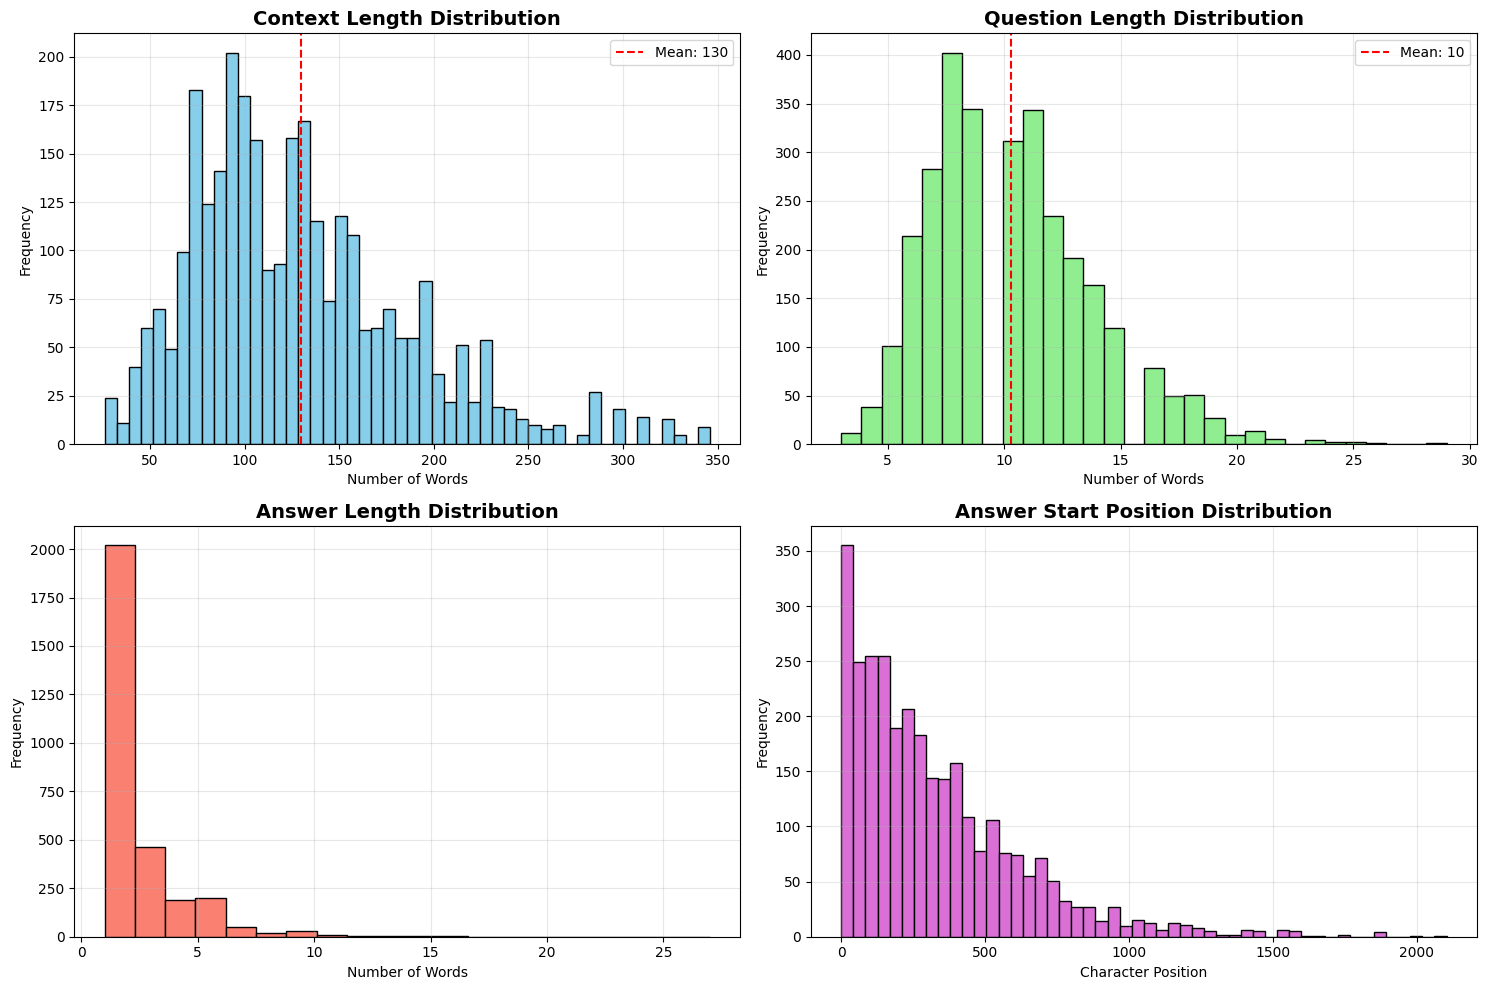


✅ Visualizations saved as 'squad_statistics.png'


In [13]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Context Length Distribution
axes[0, 0].hist(context_lengths, bins=50, color='skyblue', edgecolor='black')
axes[0, 0].axvline(avg_context_len, color='red', linestyle='--',
                    label=f'Mean: {avg_context_len:.0f}')
axes[0, 0].set_title('Context Length Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Question Length Distribution
axes[0, 1].hist(question_lengths, bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].axvline(avg_question_len, color='red', linestyle='--',
                    label=f'Mean: {avg_question_len:.0f}')
axes[0, 1].set_title('Question Length Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: Answer Length Distribution
axes[1, 0].hist(answer_lengths, bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Answer Length Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Words')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Answer Start Position Distribution
axes[1, 1].hist(answer_starts, bins=50, color='orchid', edgecolor='black')
axes[1, 1].set_title('Answer Start Position Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Character Position')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('squad_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved as 'squad_statistics.png'")
